In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def decibels_to_gain(x):
    if x > float("-inf"):
        return 10 ** (x / 20)
    return 0

In [32]:
import math

def gain_to_decibels(x):
    if x > 0:
        return math.log10(x) * 20
    return float("-inf")

In [33]:
threshold = -20
ratio = 4
knee = 6

In [34]:
def get_gain_reduction(env):
    lower_knee_bound = threshold - (knee / 2)
    upper_knee_bound = threshold + (knee / 2)
    gain_reduction = 1 - (1 / ratio)
    if env <= lower_knee_bound:
        return 0
    elif env <= upper_knee_bound:
        gain_reduction *= ((env - lower_knee_bound) / knee) / 2
        return gain_reduction * (lower_knee_bound - env)
    else:
        return gain_reduction * (threshold - env)

In [35]:
def process_sample(sample):
    env = gain_to_decibels(abs(sample))
    gain = get_gain_reduction(env)
    return sample * decibels_to_gain(gain)

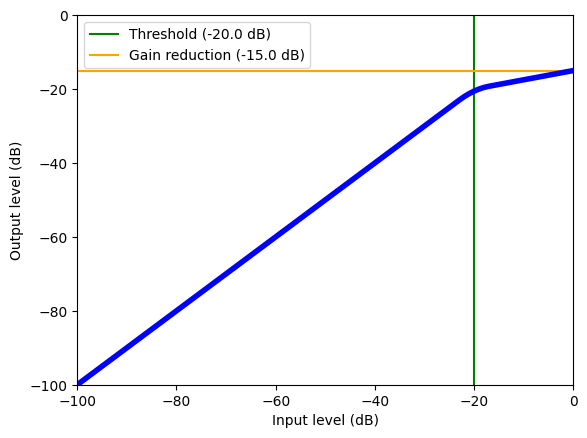

In [52]:
%matplotlib inline

x = np.linspace(-100,0,101)
y = np.array([gain_to_decibels(process_sample(decibels_to_gain(i))) for i in x])
plt.xlim(-100, 0)
plt.ylim(-100, 0)
plt.plot([threshold, threshold], [-100, 0], color="green", label=f"Threshold ({threshold:.1f} dB)")
plt.plot([-100, 0], [get_gain_reduction(0), get_gain_reduction(0)], color="orange", label=f"Gain reduction ({get_gain_reduction(0):.1f} dB)")
plt.plot(x, y, color="blue", linewidth=4)
plt.ylabel("Output level (dB)")
plt.xlabel("Input level (dB)")
plt.legend()
plt.show()

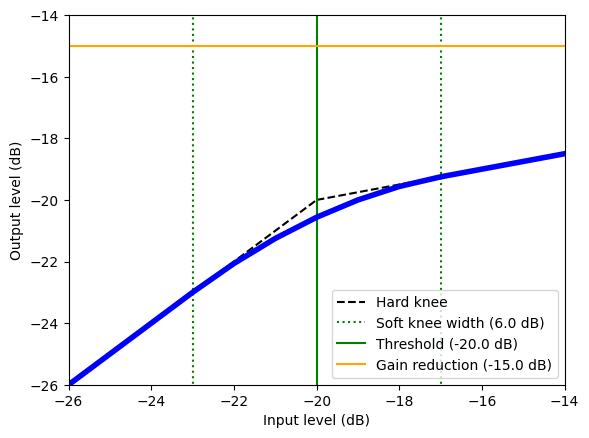

In [51]:
%matplotlib inline

x = np.linspace(-100,0,101)
y = np.array([gain_to_decibels(process_sample(decibels_to_gain(i))) for i in x])
plt.xlim(threshold - knee, threshold + knee)
plt.ylim(threshold - knee, threshold + knee)
plt.plot([-100, threshold], [-100, threshold], "--", color="black", label="Hard knee")
plt.plot([threshold, 0], [threshold * (1 / ratio) + get_gain_reduction(0), get_gain_reduction(0)], "--", color="black")
plt.plot([threshold - knee / 2, threshold - knee / 2], [-100, 0], ":", color="green", label=f"Soft knee width ({knee:.1f} dB)")
plt.plot([threshold + knee / 2, threshold + knee / 2], [-100, 0], ":", color="green")
plt.plot([threshold, threshold], [-100, 0], color="green", label=f"Threshold ({threshold:.1f} dB)")
plt.plot([-100, 0], [get_gain_reduction(0), get_gain_reduction(0)], color="orange", label=f"Gain reduction ({get_gain_reduction(0):.1f} dB)")
plt.plot(x, y, color="blue", linewidth=4)
plt.ylabel("Output level (dB)")
plt.xlabel("Input level (dB)")
plt.legend()
plt.show()